<a href="https://colab.research.google.com/github/datlt189/AI_LeTienDat_20146151/blob/main/vehicle_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import cv2
import random 
import re 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
i=0
labelname = []
images = []
images_path = []
images_pixels = []
labels =[]

In [5]:
path = "/content/drive/MyDrive/dataforFinal"
for directory in os.listdir(path):
    labelname.append(directory)
    for img in os.listdir(os.path.join(path,directory)):
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(path,directory),img)
            images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path,1)
            images_pixels.append(cv2.resize(img_pix,(180,180)))
            labels.append(i)
    i= i+1

print("Total Labels: ", len(labels))
print("Total images: ", len(images))
print("Total output: ", len(labelname))
print("Total images_pixels: ", len(images_pixels))

Total Labels:  304
Total images:  304
Total output:  4
Total images_pixels:  304


In [6]:
shuff = list(zip(images_pixels,labels))
random.shuffle(shuff)
train_data, labels_data = zip(*shuff)

In [7]:
x_data = np.array(train_data)
x_data[0]

array([[[235, 240, 255],
        [235, 240, 255],
        [235, 242, 255],
        ...,
        [ 83, 151, 242],
        [ 79, 151, 244],
        [ 79, 151, 245]],

       [[250, 251, 254],
        [250, 251, 254],
        [250, 252, 254],
        ...,
        [136, 178, 241],
        [124, 173, 238],
        [123, 172, 238]],

       [[251, 251, 254],
        [251, 251, 254],
        [252, 251, 254],
        ...,
        [196, 223, 249],
        [184, 218, 248],
        [182, 217, 247]],

       ...,

       [[155, 146, 138],
        [155, 146, 138],
        [155, 146, 138],
        ...,
        [164, 161, 159],
        [164, 161, 159],
        [164, 161, 159]],

       [[167, 162, 155],
        [167, 162, 155],
        [167, 162, 155],
        ...,
        [165, 162, 160],
        [165, 162, 160],
        [165, 162, 160]],

       [[166, 162, 157],
        [166, 162, 157],
        [166, 162, 157],
        ...,
        [165, 162, 160],
        [165, 162, 160],
        [165, 162, 160]]

In [8]:
y_data = np.array(labels_data)
y_data[0:5]

array([1, 1, 1, 1, 0])

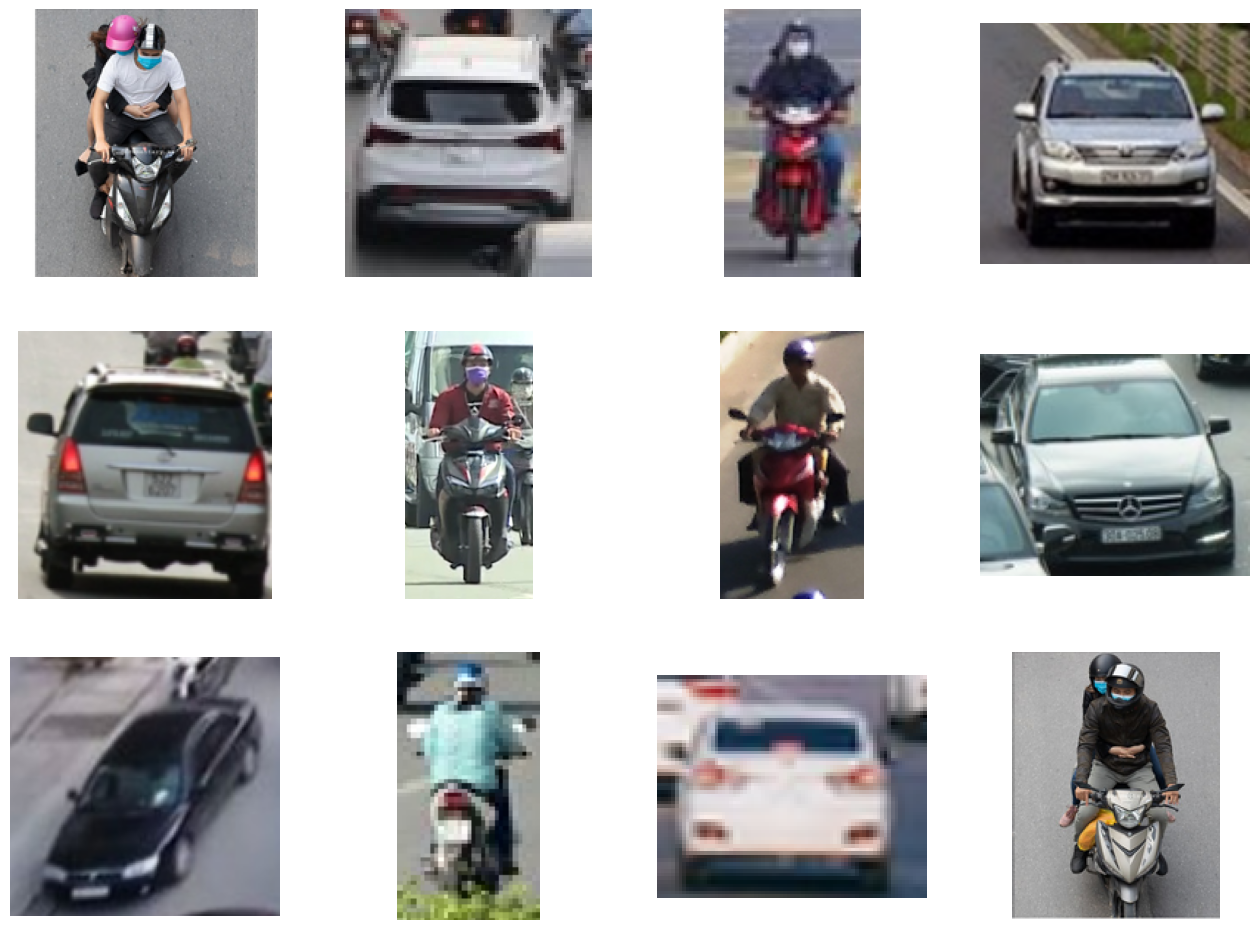

In [9]:
fig = plt.gcf()
fig.set_size_inches(16,16)

next_pix = images_path
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp=plt.subplot(4,4,i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [10]:
print("X data shape : ", x_data.shape)
print("Y data shape : ", y_data.shape)

X data shape :  (304, 180, 180, 3)
Y data shape :  (304,)


In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(x_data,y_data,test_size= 0.2, random_state=20)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y test data : ", len(Y_train))
print("Y label data : ", len(Y_val))

X train data :  243
X label data :  61
Y test data :  243
Y label data :  61


In [12]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180,180,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [13]:
model.compile(optimizer = 'adam', loss= "binary_crossentropy", metrics=["acc"])

In [14]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.3,
    channel_shift_range=0.0,
    fill_mode='nearest')
datagen.fit(X_train)

In [15]:
history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=32),
                             epochs=2, validation_data= (X_val,Y_val), verbose=1)

<ipython-input-15-c73ebe31f301>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=32),


Epoch 1/2
8/8 [==============================] - 14s 295ms/step - loss: 230.4911 - acc: 0.4979 - val_loss: 13.0516 - val_acc: 0.5246
Epoch 2/2
8/8 [==============================] - 2s 211ms/step - loss: 3.4530 - acc: 0.5967 - val_loss: 0.4126 - val_acc: 0.8033


In [27]:
model.save('/content/drive/MyDrive/model_colab/vehicle_classification.h5')

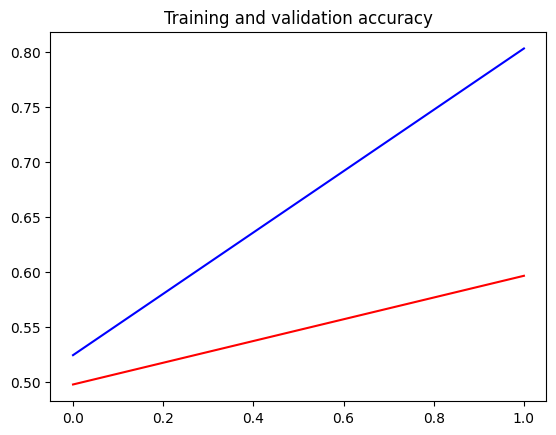

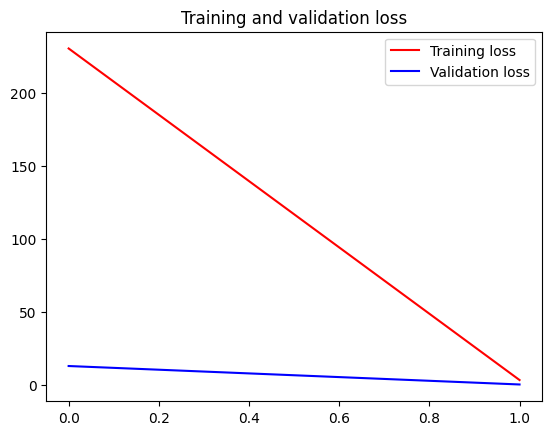

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [17]:
pred = model.predict(X_val)
pred

2/2 [==============================] - 0s 8ms/step


array([[4.27330941e-01],
       [5.05552113e-01],
       [5.93012869e-01],
       [5.26398897e-01],
       [1.27209187e-01],
       [5.04527032e-01],
       [6.56404614e-01],
       [9.23221886e-01],
       [3.32070142e-02],
       [8.62332642e-01],
       [1.08268313e-01],
       [8.66338074e-01],
       [6.60798967e-01],
       [8.23956251e-01],
       [4.52825904e-01],
       [7.37897605e-02],
       [4.85648811e-01],
       [6.83078356e-03],
       [8.08939874e-01],
       [6.00139439e-01],
       [1.23328231e-02],
       [1.17053594e-02],
       [4.45034474e-01],
       [7.18226731e-01],
       [6.13564968e-01],
       [3.76801908e-01],
       [1.22079164e-01],
       [4.15501863e-01],
       [7.41782606e-01],
       [7.95908198e-02],
       [8.72478560e-02],
       [3.80900204e-01],
       [8.71140182e-01],
       [6.36891901e-01],
       [9.85659063e-01],
       [1.50075316e-01],
       [1.24506816e-01],
       [4.82044846e-01],
       [9.99885440e-01],
       [1.10951722e-01],


1/1 [==============================] - 0s 22ms/step
Ô tô


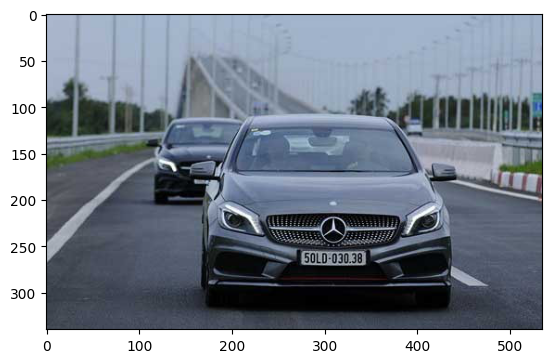

In [56]:
# Load ảnh vào
from keras.preprocessing import image
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/testvehicles/atestcar.jpg'
img = load_img(img_path)
plt.imshow(img)
img = load_img(img_path, target_size=(180, 180))
img_array = img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

# Dự đoán lớp của ảnh
prediction = model.predict(img_batch)

if prediction[0][0] > 0.5:
    print("Xe máy")
else:
    print("Ô tô")

In [49]:
import cv2
import numpy as np
from keras.models import load_model

# Load model
model = load_model('/content/drive/MyDrive/model_colab/vehicle_classification.h5')

# Load image
img_path = '/content/drive/MyDrive/testvehicles/threecartest.png'
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (180, 180))

# Predict vehicle type
prediction = model.predict(np.array([img_resized]))
if prediction[0][0] > 0.5:
    vehicle_type = 'Car'
else:
    vehicle_type = 'Motorbike'

# Count vehicles
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # tăng kernel size của Gaussian blur
edges = cv2.Canny(blurred, 30, 100)  # giảm ngưỡng để tăng số lượng cạnh được phát hiện
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))  # sử dụng kernel MORPH_RECT để loại bỏ các contour nhỏ
dilated = cv2.dilate(edges, kernel, iterations=1)
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
vehicle_count = 0
for contour in contours:
    if cv2.contourArea(contour) > 300:  # giảm diện tích tối thiểu để loại bỏ các contour nhỏ hơn
        vehicle_count += 1

# Print result
print('Vehicle type:', vehicle_type)
print('Vehicle count:', vehicle_count)

1/1 [==============================] - 0s 69ms/step
Vehicle type: Motorbike
Vehicle count: 3


In [60]:
# Load pre-trained CNN model
model = load_model('/content/drive/MyDrive/model_colab/vehicle_classification.h5')

# Read image and perform vehicle detection
img = cv2.imread('/content/drive/MyDrive/testvehicles/twomototest.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 30, 100)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilated = cv2.dilate(edges, kernel, iterations=1)
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Divide image into subimages based on detected contours
subimages = []
for contour in contours:
    if cv2.contourArea(contour) > 2000:
        x,y,w,h = cv2.boundingRect(contour)
        subimg = img[y:y+h, x:x+w]
        subimages.append(subimg)

# Classify subimages using pre-trained CNN model
car_count = 0
motorbike_count = 0
for subimg in subimages:
    resized = cv2.resize(subimg, (180, 180))
    resized = np.expand_dims(resized, axis=0)
    resized = resized.astype('float32') / 255
    pred = model.predict(resized)
    if pred[0][0] > 0.5:
        motorbike_count += 1
        cv2.imwrite('motorbike_subimg.jpg', subimg) # Lưu ảnh chứa xe máy vào file motorbike_subimg.jpg
    else:
        car_count += 1
        cv2.imwrite('car_subimg.jpg', subimg) # Lưu ảnh chứa ô tô vào file car_subimg.jpg

# Print result
print('Car count:', car_count)
print('Motorbike count:', motorbike_count)

1/1 [==============================] - 0s 17ms/step
Car count: 1
Motorbike count: 1
